Comparing the following groups: ['NEG' 'RHI']
[1000903, 1000318, 1000330, 1000285, 3939, 1000463, 9068, 3802, 3598, 1000271, 1000073, 1000057, 1000661, 5829, 1000017]
Top features: [1000903, 1000318, 1000330, 1000285, 3939, 1000463, 9068, 3802, 3598, 1000271, 1000073, 1000057, 1000661, 5829, 1000017]


<Figure size 1080x288 with 0 Axes>

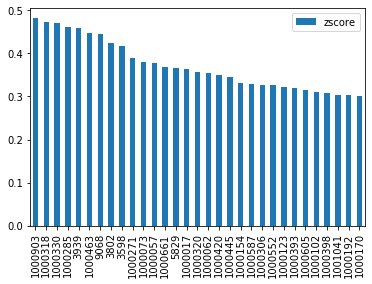

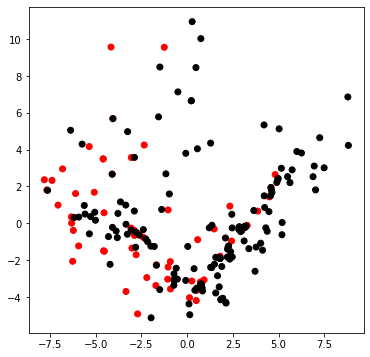

--------------------------------------------------
Logistic Regression
Model coefficients: [[-0.25356561 -0.19348929 -0.17571408 -0.13400129  0.2294032  -0.20203831
   0.23009242  0.31890153  0.09625873 -0.10118179  0.1283665   0.28053124
  -0.4361529   0.14393876 -0.00200009]]
              precision    recall  f1-score   support

         NEG       0.56      0.46      0.51      41.0
         RHI       0.54      0.63      0.58      41.0

    accuracy                           0.55      82.0
   macro avg       0.55      0.55      0.54      82.0
weighted avg       0.55      0.55      0.54      82.0

Confusion matrix: 
Predicted
      ['NEG' 'RHI']
Test  NEG [18.92307692 22.07692308]
      RHI [15. 26.]


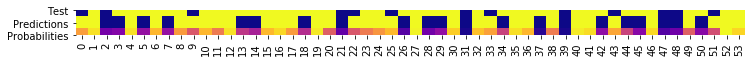

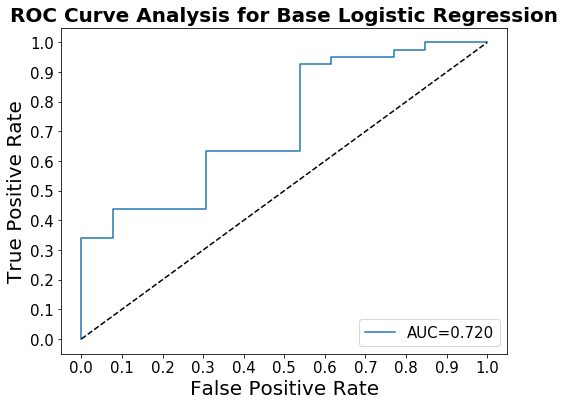

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'C': 0.6111111111111112, 'penalty': 'l1'}
Model coefficients: [[-0.21405254 -0.17641437 -0.16671389 -0.13206085  0.20604397 -0.16668481
   0.20169216  0.28292807  0.08309714 -0.09081516  0.08654975  0.250942
  -0.39477599  0.12052444 -0.01024087]]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished
/Users/jacknicoludis/anaconda3/envs/Renv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


              precision    recall  f1-score   support

         NEG       0.63      0.54      0.58      41.0
         RHI       0.60      0.68      0.64      41.0

    accuracy                           0.61      82.0
   macro avg       0.61      0.61      0.61      82.0
weighted avg       0.61      0.61      0.61      82.0

Confusion matrix: 
Predicted
      ['NEG' 'RHI']
Test  NEG [22.07692308 18.92307692]
      RHI [13. 28.]


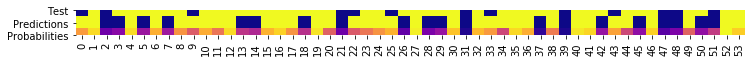

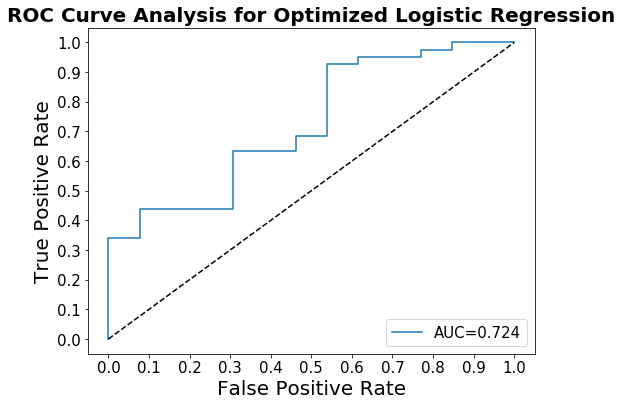

For OSU ID 1000903 , t-test statistic:  Ttest_indResult(statistic=3.518045246088081, pvalue=0.0005323138323105868)
For OSU ID 1000318 , t-test statistic:  Ttest_indResult(statistic=3.438183223781634, pvalue=0.0007054848269363597)
For OSU ID 1000330 , t-test statistic:  Ttest_indResult(statistic=3.2749325161680907, pvalue=0.0012352634494509826)
For OSU ID 1000285 , t-test statistic:  Ttest_indResult(statistic=3.317371343314058, pvalue=0.0010700325583539246)
For OSU ID 3939 , t-test statistic:  Ttest_indResult(statistic=-2.8842943632798512, pvalue=0.004329711789843247)
For OSU ID 1000463 , t-test statistic:  Ttest_indResult(statistic=3.277549586487838, pvalue=0.0012244239275141337)
For OSU ID 9068 , t-test statistic:  Ttest_indResult(statistic=-2.5862008111290478, pvalue=0.010376609162165415)
For OSU ID 3802 , t-test statistic:  Ttest_indResult(statistic=-2.545711963311264, pvalue=0.011619331401365696)
For OSU ID 3598 , t-test statistic:  Ttest_indResult(statistic=-2.6297026243652346, pv

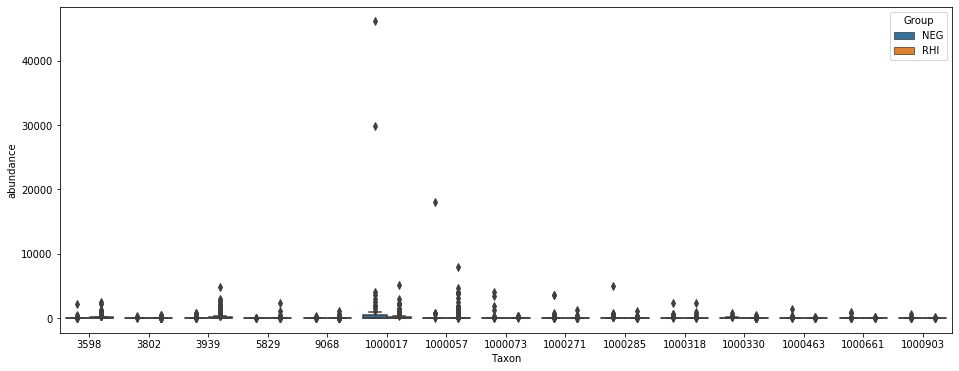

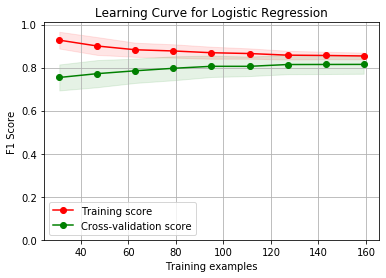

In [74]:
%run run_model.ipynb

#OSU abundance files that are output from HiMAP
osu_files = ['data_files/group1/osu_abundances.txt',
             'data_files/group2/osu_abundances.txt',
             'data_files/group3/osu_abundances.txt']

#Taxonomy files that are output from HiMAP
tax_files = ['data_files/group1/osu_taxonomy.txt',
             'data_files/group2/osu_taxonomy.txt',
             'data_files/group3/osu_taxonomy.txt']

#File containing meta-deta, must have:
# "Group" - the label data
# "Run accession" - the Sample ID that is in the OSU_abundances files
meta_file = 'data_files/HIV_acquisition_metadata.csv'

#Specify the type of normalization
# clr - centered log-ratio
# tss - total sum scaling
# css - cumulative sum scaling
norm_type = 'clr'

#Number of components
#Works when feature_reduction is not None
ncomp = 15 #integer

#Specify whether to level the abundances up a level in phylogeny
# genus, family, order, phylum, None
levelup = None 

#Specify groups to compare (only binary classification)
# NEG - negative
# RHI - recently HIV infected
# CHI_ART - chronically HIV infected, on ARTs
# CHI_noART - chronically HIV infected, not on ARTs
groups = ['NEG', 'RHI'] 

#specify how to reduce the feature number
#zscore - sorted by Z-score
#corr - Correlation with labels
#diff - sorted by difference in mean abundance
#svd - SVD-Truncate
#None - No dimensionality reduction
feat_reduction = 'zscore'

#specify the test fraction
test_frac = 0.25

#specify the classification model
#lg - logistic regression
#rf - random forest
#xg - XGBoost
#all - all three
model = 'lg' 

#specify whether to upsample the minor fraction
upsample = False 

#specify whether to make PCA plot
plot_pca = True

#specify whether to plot Learning Curve
plot_lc = True

#specify whether to make abundance plots for top features
plot_ab_comp = True


an_df = run_entire_model(osu_files, 
                         tax_files, 
                         meta_file, 
                         norm_type,
                         ncomp,
                         levelup, 
                         groups, 
                         feat_reduction, 
                         test_frac, 
                         model,
                         upsample,
                         plot_pca,
                         plot_lc,
                         plot_ab_comp)
